# Real-World Data Science Project Walkthrough: Housing Price Prediction


---

## Problem Statement

We are trying to **predict housing prices** based on features like size, number of bedrooms, bathrooms, neighborhood, and more.

---


### Stakeholders

- Home Buyers and Sellers
- Real Estate Agents
- Real Estate Investors
- Developers and Builders
- Financial Institutions

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
import seaborn as sns
import pandas as pd
import importlib
import evaluate
importlib.reload(evaluate)
warnings.filterwarnings('ignore')

 # 1. Business Understanding

Project Overview:

....

StakeHolder Analysis:

1. Home Buyers and Sellers: 
    - Needs:
    - Benefits of the Model:
2. e.t.c

# 2. Data Acquisition and Preparation




#### Step 1: Load the Data

In [31]:
df = pd.read_csv("data/housing_data.csv")
df

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Neighborhood,Price
0,1500.0,3.0,2.0,1.0,A,250000.0
1,1800.0,4.0,2.0,1.0,A,280000.0
2,2400.0,3.0,3.0,1.0,B,340000.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,3500.0,4.0,3.0,0.0,C,390000.0
5,4000.0,5.0,4.0,1.0,C,480000.0
6,1200.0,2.0,1.0,0.0,A,210000.0
7,1600.0,3.0,2.0,1.0,B,260000.0
8,2200.0,4.0,2.0,0.0,C,320000.0
9,2800.0,5.0,3.0,1.0,A,5000000.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    9 non-null      float64
 1   Bedrooms      9 non-null      float64
 2   Bathrooms     9 non-null      float64
 3   HasGarage     9 non-null      float64
 4   Neighborhood  9 non-null      object 
 5   Price         9 non-null      float64
dtypes: float64(5), object(1)
memory usage: 612.0+ bytes


---

## Step 2: Data Cleaning

### A. Dealing with Missing Values

In real-world data, we often find missing values.

In [33]:
df.isnull().sum()

SquareFeet      1
Bedrooms        1
Bathrooms       1
HasGarage       1
Neighborhood    1
Price           1
dtype: int64

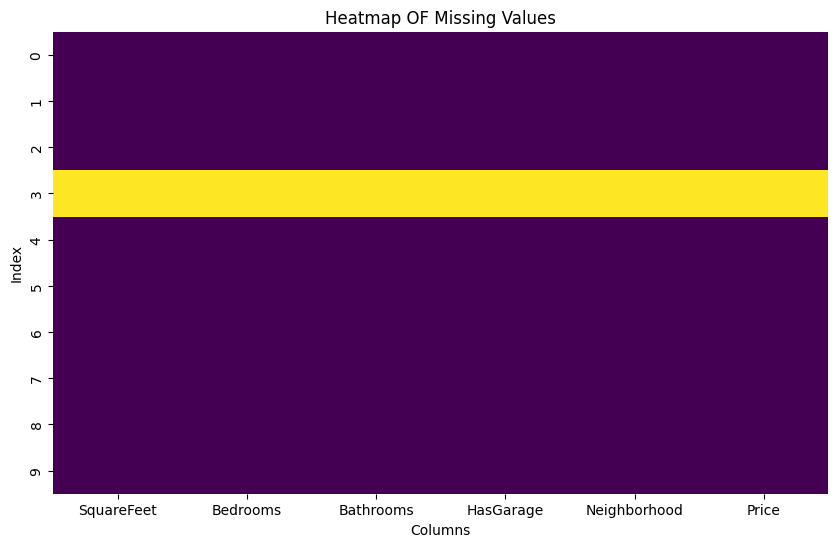

In [34]:
missing_values = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)

plt.title("Heatmap OF Missing Values")
plt.xlabel("Columns")
plt.ylabel('Index')
plt.show()

In [35]:
df

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Neighborhood,Price
0,1500.0,3.0,2.0,1.0,A,250000.0
1,1800.0,4.0,2.0,1.0,A,280000.0
2,2400.0,3.0,3.0,1.0,B,340000.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,3500.0,4.0,3.0,0.0,C,390000.0
5,4000.0,5.0,4.0,1.0,C,480000.0
6,1200.0,2.0,1.0,0.0,A,210000.0
7,1600.0,3.0,2.0,1.0,B,260000.0
8,2200.0,4.0,2.0,0.0,C,320000.0
9,2800.0,5.0,3.0,1.0,A,5000000.0


If any missing:

In [36]:
df.fillna(df.select_dtypes(include='number').mean().round(), inplace=True)

#Remove decimals

df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').astype(int)
df

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Neighborhood,Price
0,1500,3,2,1,A,250000
1,1800,4,2,1,A,280000
2,2400,3,3,1,B,340000
3,2333,4,2,1,NaN,836667
4,3500,4,3,0,C,390000
5,4000,5,4,1,C,480000
6,1200,2,1,0,A,210000
7,1600,3,2,1,B,260000
8,2200,4,2,0,C,320000
9,2800,5,3,1,A,5000000


In [37]:
df['Neighborhood'].fillna(df['Neighborhood'].mode()[0], inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Neighborhood,Price
0,1500,3,2,1,A,250000
1,1800,4,2,1,A,280000
2,2400,3,3,1,B,340000
3,2333,4,2,1,A,836667
4,3500,4,3,0,C,390000
5,4000,5,4,1,C,480000
6,1200,2,1,0,A,210000
7,1600,3,2,1,B,260000
8,2200,4,2,0,C,320000
9,2800,5,3,1,A,5000000


### Handle Outliers

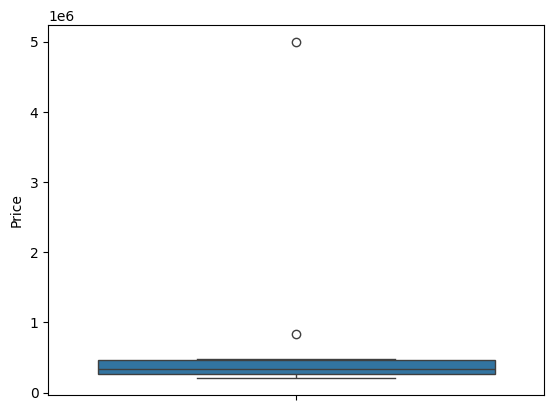

In [38]:
sns.boxplot(df['Price'])
plt.show()

In [39]:
## IQR = Q3 - Q1

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

#IQR

IQR = Q3 - Q1

#Upper Bound & Lower Bound

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter and remove ouliters

df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


df_filtered

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Neighborhood,Price
0,1500,3,2,1,A,250000
1,1800,4,2,1,A,280000
2,2400,3,3,1,B,340000
4,3500,4,3,0,C,390000
5,4000,5,4,1,C,480000
6,1200,2,1,0,A,210000
7,1600,3,2,1,B,260000
8,2200,4,2,0,C,320000


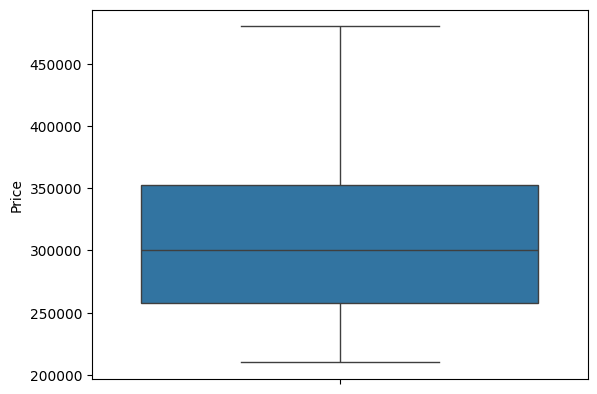

In [40]:
sns.boxplot(df_filtered['Price'])
plt.show()

### Handling Categorical Variables

We can use **One-Hot Encoding**:

In [41]:
df_clean = df_filtered.copy()
df_clean = pd.get_dummies(df_clean, columns=['Neighborhood'], drop_first=True).astype(int)

Now "Neighborhood" becomes binary flags: `Neighborhood_B`, `Neighborhood_C`.

---


In [42]:
df_clean

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Price,Neighborhood_B,Neighborhood_C
0,1500,3,2,1,250000,0,0
1,1800,4,2,1,280000,0,0
2,2400,3,3,1,340000,1,0
4,3500,4,3,0,390000,0,1
5,4000,5,4,1,480000,0,1
6,1200,2,1,0,210000,0,0
7,1600,3,2,1,260000,1,0
8,2200,4,2,0,320000,0,1


## Feature Engineering

In [43]:
df_clean['Expensive'] = (df_clean['Price'] > df_clean['Price'].median()).astype(int)

In [44]:
df_clean['Price_Per_Square_Feet'] = (df_clean['Price'] / df_clean["SquareFeet"]).round().astype(int)

df_clean

,SquareFeet,Bedrooms,Bathrooms,HasGarage,Price,Neighborhood_B,Neighborhood_C,Expensive,Price_Per_Square_Feet
0,1500,3,2,1,250000,0,0,0,167
1,1800,4,2,1,280000,0,0,0,156
2,2400,3,3,1,340000,1,0,1,142
4,3500,4,3,0,390000,0,1,1,111
5,4000,5,4,1,480000,0,1,1,120
6,1200,2,1,0,210000,0,0,0,175
7,1600,3,2,1,260000,1,0,0,162
8,2200,4,2,0,320000,0,1,1,145



---

## Step 3: Exploratory Data Analysis (EDA)

### Correlation Plot

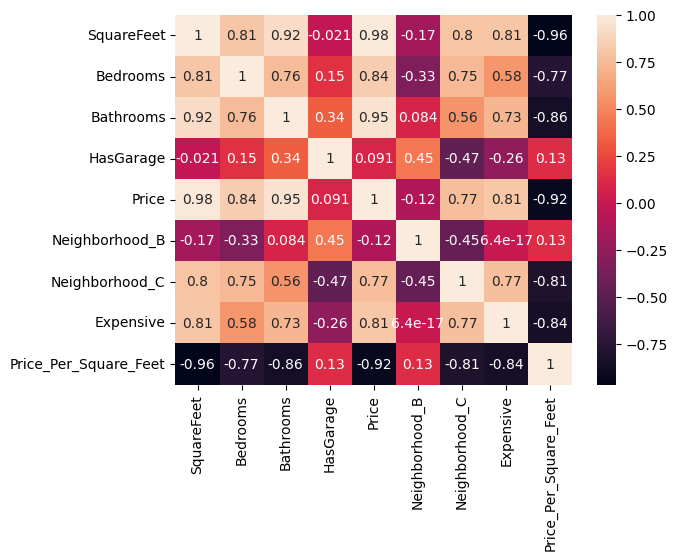

In [45]:
sns.heatmap(df_clean.corr(), annot=True)
plt.show()

Use this to check **relationships between features and target** (Price).

---

## Step 4: Modeling — Try Different Models

We’ll compare:

1. **Linear Regression**
2. **Multiple Linear Regression**
3. **Polynomial Regression**
4. **Ridge & Lasso**
5. **Logistic Regression** (for binary classification, e.g., expensive vs. cheap)
6. **KMeans Clustering** (for grouping similar houses)

We evaluate using:

* R-squared
* Adjusted R-squared
* MSE, MAE, RMSE
* Residuals & Q-Q plots
* Cross-validation
* Bias-Variance Tradeoff

We’ll go step-by-step starting with **Linear Regression**.

---




### Our Dataset

`SquareFeet, Bedrooms, Bathrooms, HasGarage, NeighbourHood, Price`

### Target Variable

Price

In [46]:
X = df_clean.drop(["Price", "Price_Per_Square_Feet", "Expensive"], axis=1)
y = df_clean["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### **Baseline: Linear Regression (StatsModels)**

In [47]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 12 Aug 2025   Prob (F-statistic):                nan
Time:                        15:54:32   Log-Likelihood:                 97.657
No. Observations:                   6   AIC:                            -183.3
Df Residuals:                       0   BIC:                            -184.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.44e+04        inf        

---

##  **Initialize Models (Linear, Polynomial, Ridge, Lasso, Decision Tree and Logistic Regression)**


In [48]:
#Models

linear_model = LinearRegression()
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3).fit(X_train, y_train)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
lasso = LassoCV(cv=3).fit(X_train, y_train)
log_model = LogisticRegression()

decision_model = DecisionTreeRegressor(max_depth=3, random_state=42)

#Scaled Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Evaluate Models**




---Linear Regression----


----Training Perfomance----
MAE: 0.00
MSE (Empirical Risk): 0.00
RMSE:  0.0000
R^2 Score: 1.0000


----Testing Perfomance----
MAE: 30000.00
MSE (Expected Risk): 1476000000.00
RMSE:  38418.7454
R^2 Score: -0.2049


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [0.01862444        nan        nan        nan        nan]
Mean CV R^2: nan
CV RMSE Scores: [34672.54042937 32977.08871278  4000.         58799.94144007
 29571.42018368]
Mean CV RMSE: 32004.20




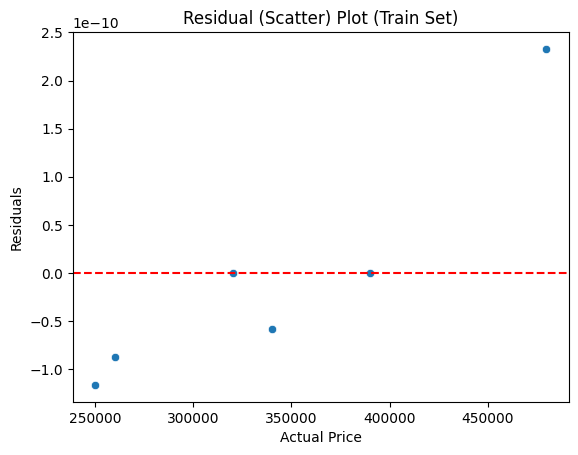

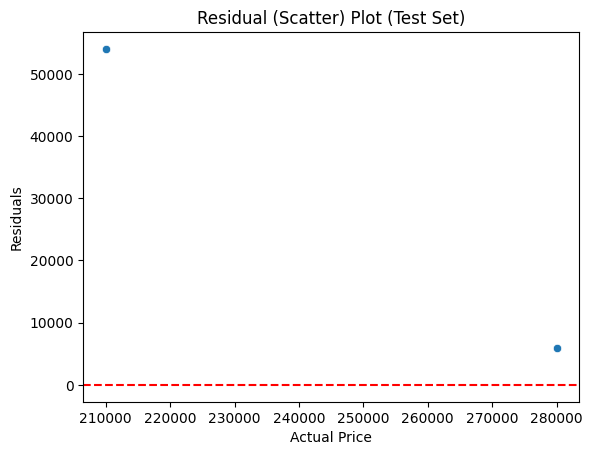

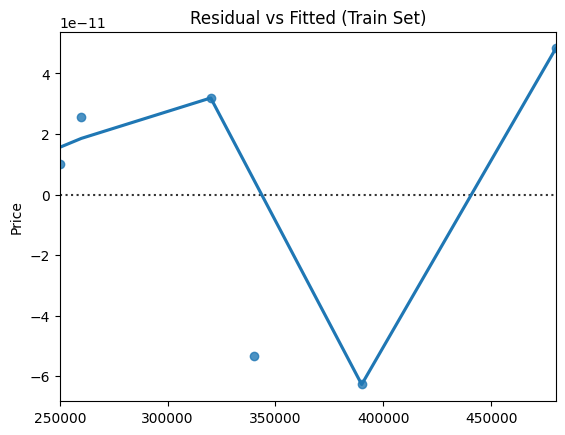

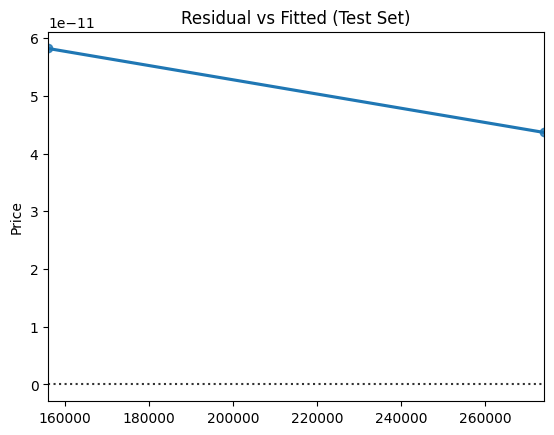

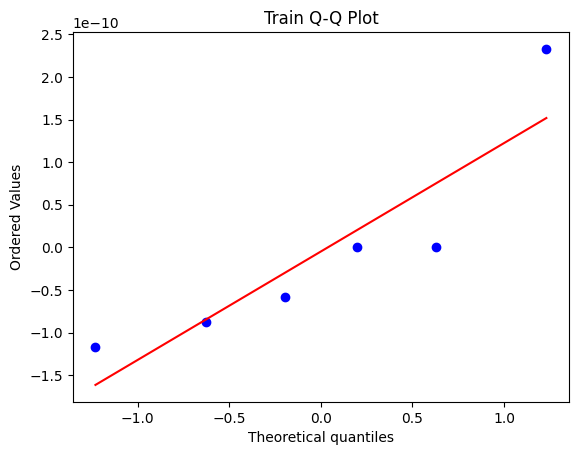

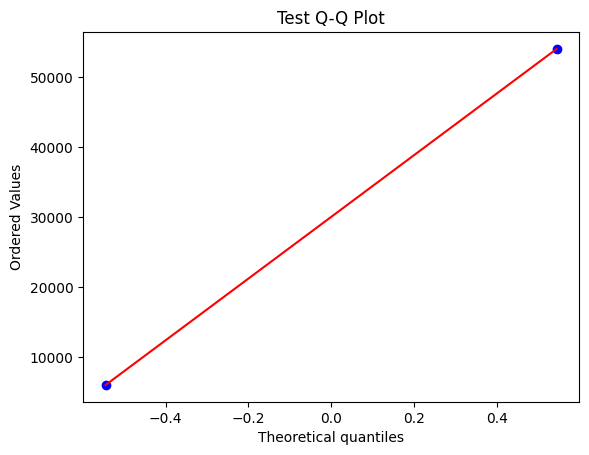




---Polynomial Regression----


----Training Perfomance----
MAE: 0.00
MSE (Empirical Risk): 0.00
RMSE:  0.0000
R^2 Score: 1.0000


----Testing Perfomance----
MAE: 5384.24
MSE (Expected Risk): 28995081.25
RMSE:  5384.7081
R^2 Score: 0.9763


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [-0.68867539         nan         nan         nan         nan]
Mean CV R^2: nan
CV RMSE Scores: [ 45482.165274    45700.12847535 121864.6780388  118478.03666185
  26307.32835702]
Mean CV RMSE: 71566.47




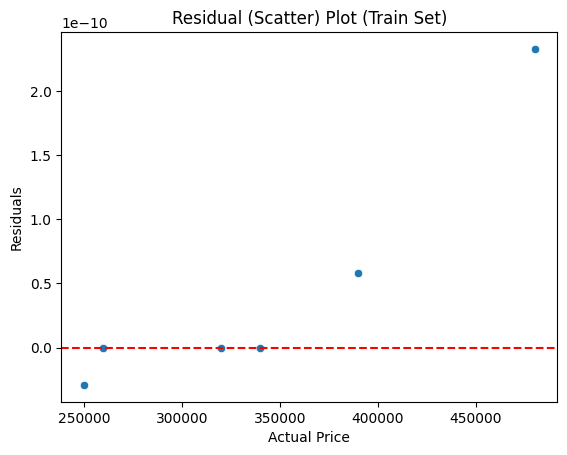

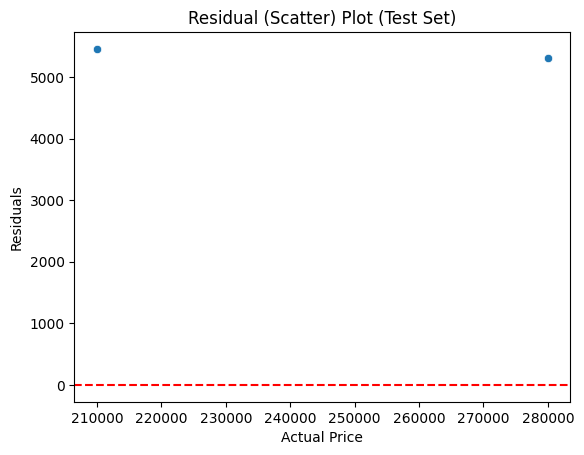

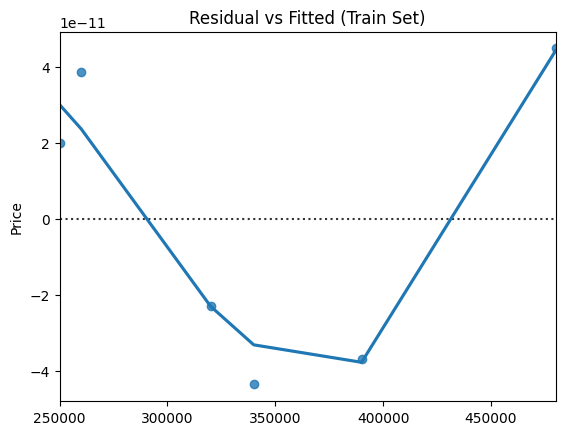

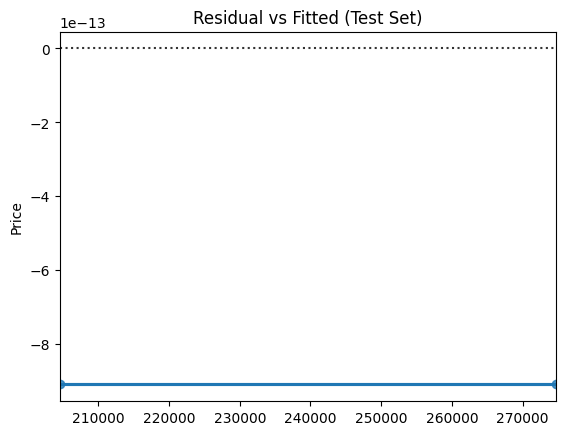

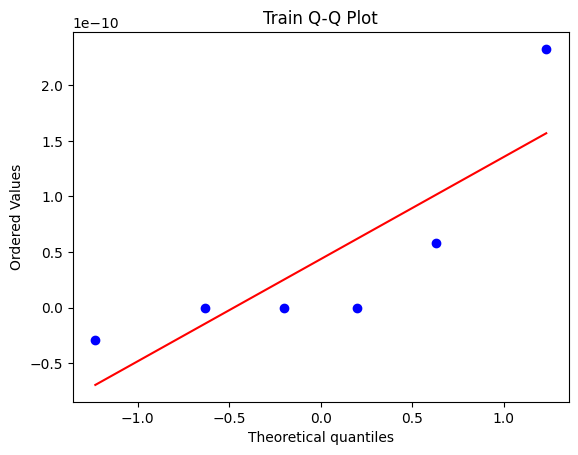

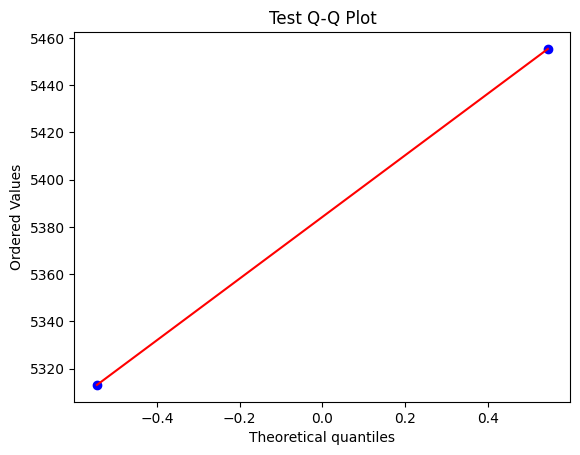




---Ridge Regression----


----Training Perfomance----
MAE: 11923.32
MSE (Empirical Risk): 212874702.55
RMSE:  14590.2263
R^2 Score: 0.9655


----Testing Perfomance----
MAE: 7730.58
MSE (Expected Risk): 115732833.10
RMSE:  10757.9196
R^2 Score: 0.9055


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [0.14595975        nan        nan        nan        nan]
Mean CV R^2: nan
CV RMSE Scores: [32345.0043102  29714.88855561 33585.90553469 54627.32467449
 22846.9343578 ]
Mean CV RMSE: 34624.01




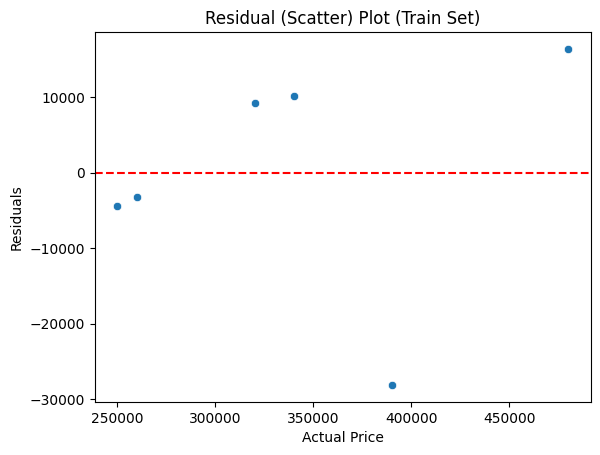

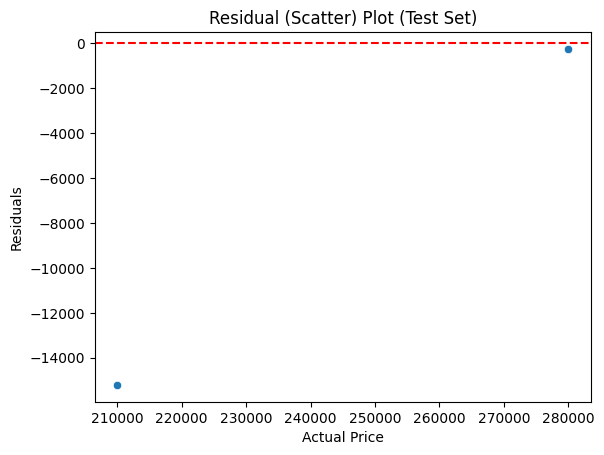

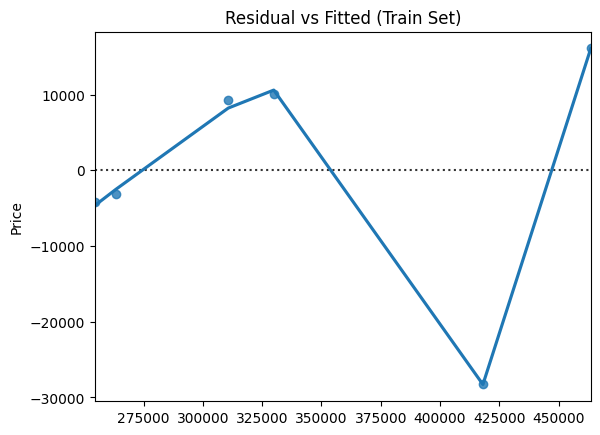

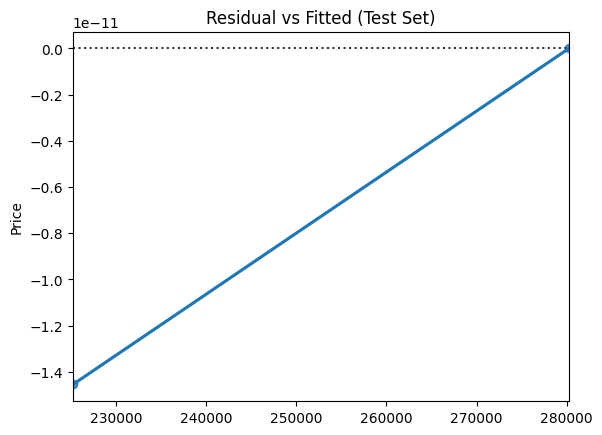

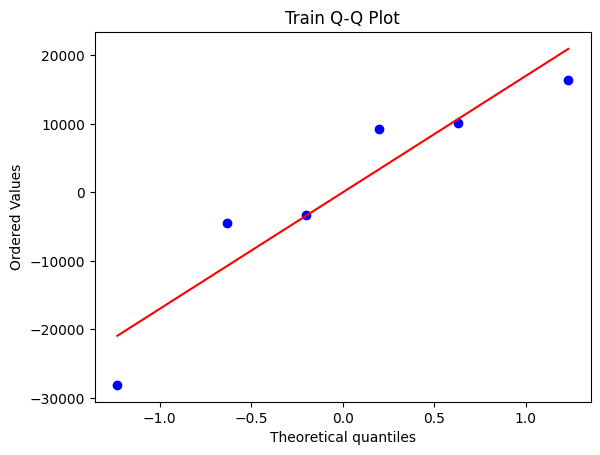

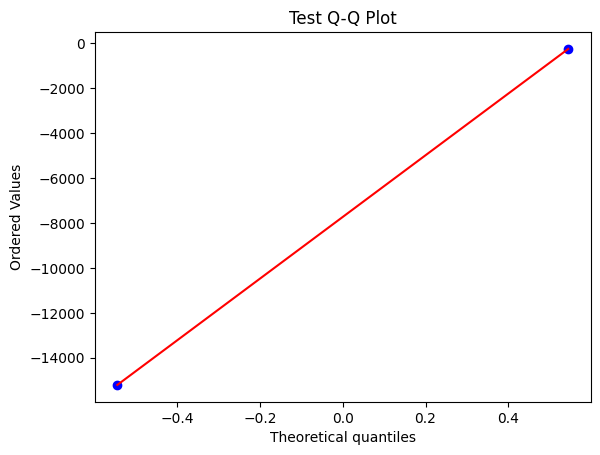




---Lasso Regression----


----Training Perfomance----
MAE: 12343.34
MSE (Empirical Risk): 242222397.07
RMSE:  15563.4957
R^2 Score: 0.9607


----Testing Perfomance----
MAE: 10109.00
MSE (Expected Risk): 188020079.27
RMSE:  13712.0414
R^2 Score: 0.8465


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [0.96582492        nan        nan        nan        nan]
Mean CV R^2: nan
CV RMSE Scores: [ 6470.27572175 13056.24378883 53132.8842496  45307.0012607
  3831.3067186 ]
Mean CV RMSE: 24359.54




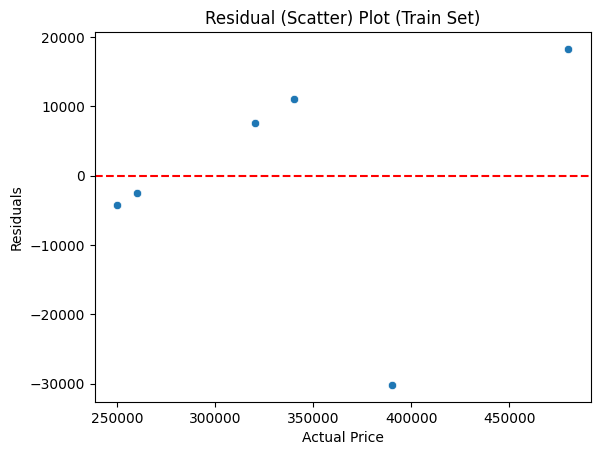

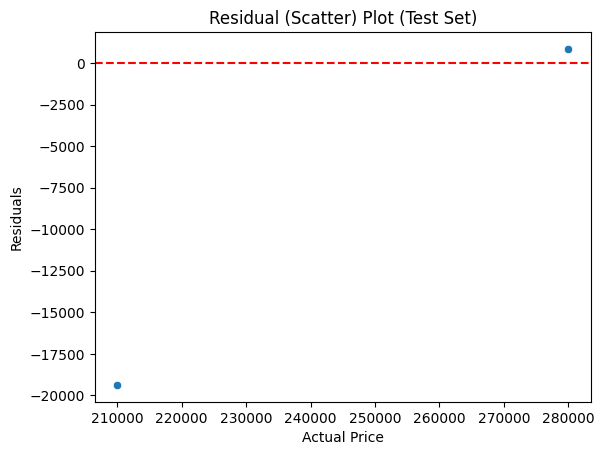

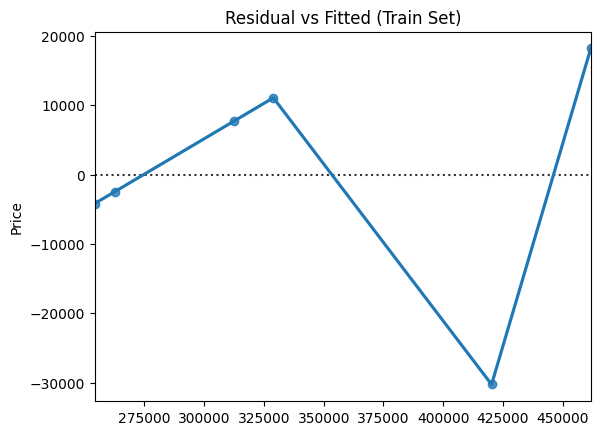

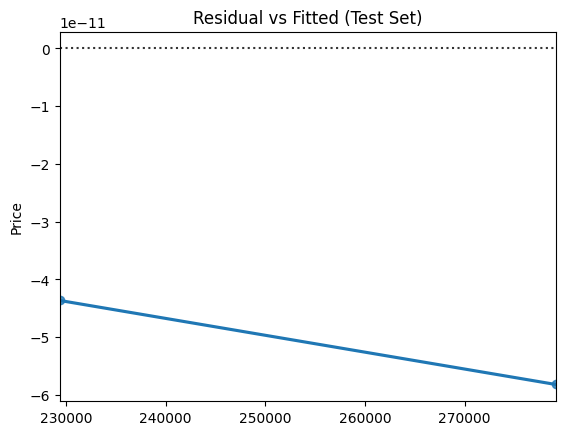

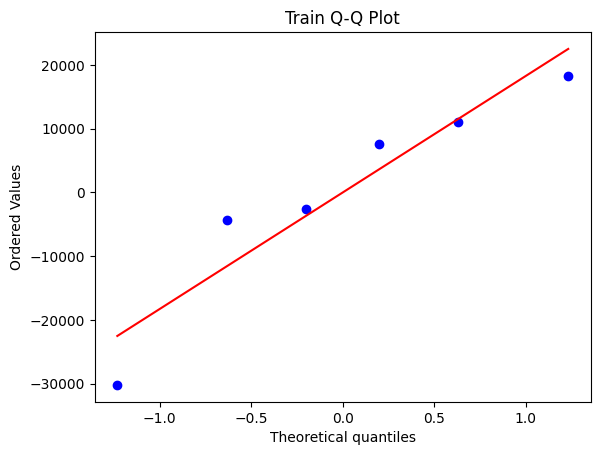

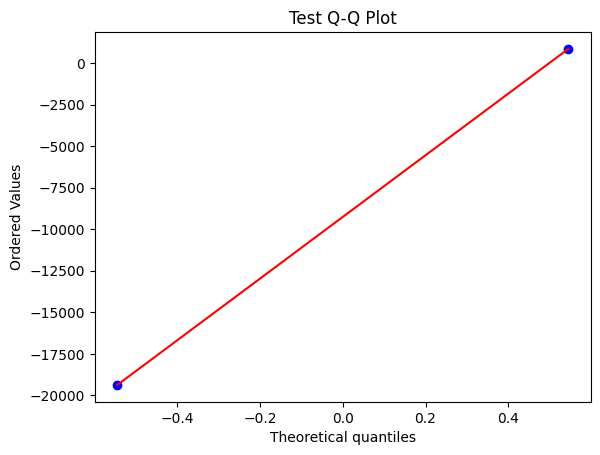

In [49]:
evaluate.evaluate_regression_model("Linear Regression", df_clean, linear_model, X_train, X_test, y_train, y_test, True)

evaluate.evaluate_regression_model("Polynomial Regression", df_clean, poly_model, X_train, X_test, y_train, y_test, True)

evaluate.evaluate_regression_model("Ridge Regression", df_clean, ridge, X_train, X_test, y_train, y_test, True)

evaluate.evaluate_regression_model("Lasso Regression", df_clean, lasso, X_train, X_test, y_train, y_test, True)

## **Evaluate Decision Tree Based on Scaled and Unscaled Data**




---Decision Tree----


----Training Perfomance----
MAE: 0.00
MSE (Empirical Risk): 0.00
RMSE:  0.0000
R^2 Score: 1.0000


----Testing Perfomance----
MAE: 35000.00
MSE (Expected Risk): 1250000000.00
RMSE:  35355.3391
R^2 Score: -0.0204


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [-22.59183673          nan          nan          nan          nan]
Mean CV R^2: nan
CV RMSE Scores: [170000.  80000.  90000.  90000.  10000.]
Mean CV RMSE: 88000.00




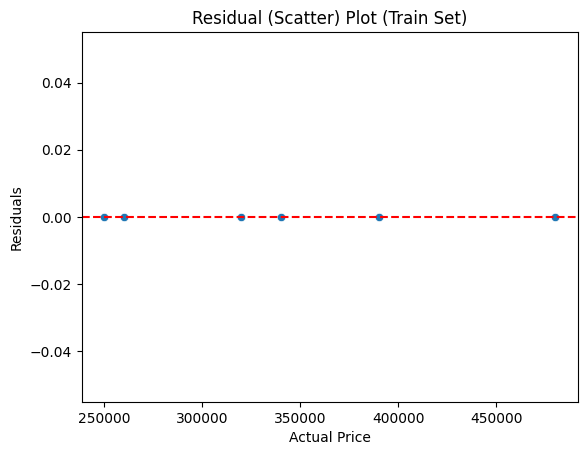

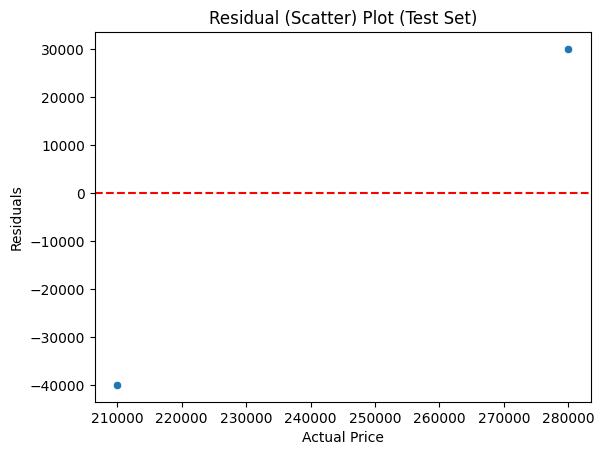

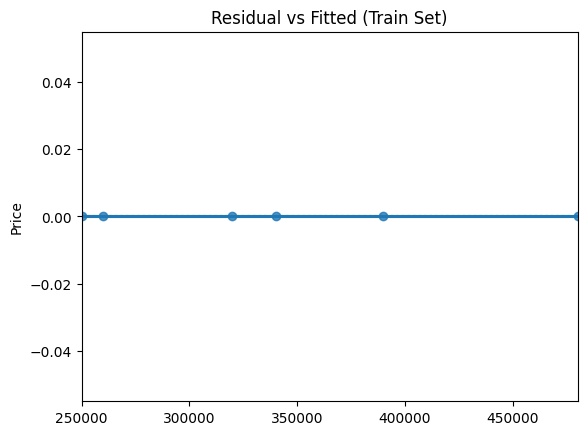

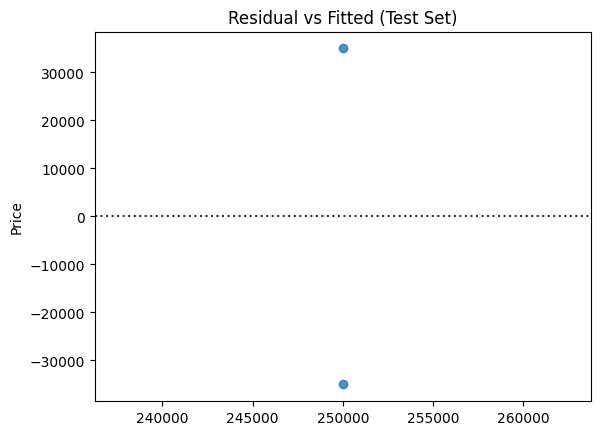

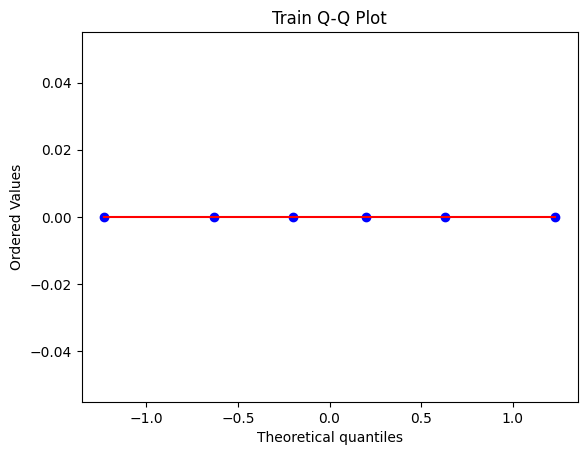

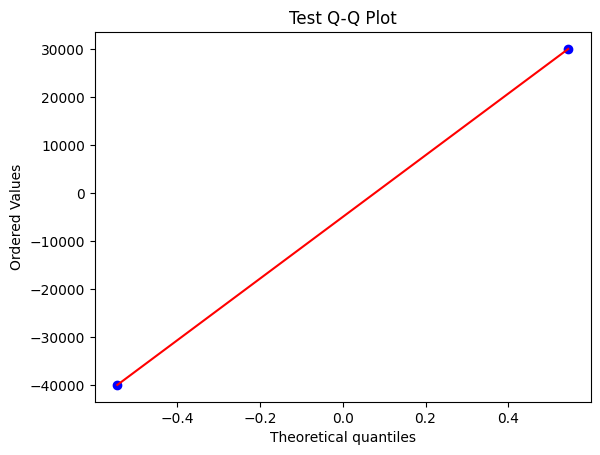




---Decision Tree (With Scaled Data)----


----Training Perfomance----
MAE: 0.00
MSE (Empirical Risk): 0.00
RMSE:  0.0000
R^2 Score: 1.0000


----Testing Perfomance----
MAE: 35000.00
MSE (Expected Risk): 1250000000.00
RMSE:  35355.3391
R^2 Score: -0.0204


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [-22.59183673          nan          nan          nan          nan]
Mean CV R^2: nan
CV RMSE Scores: [170000.  80000.  90000.  90000.  10000.]
Mean CV RMSE: 88000.00




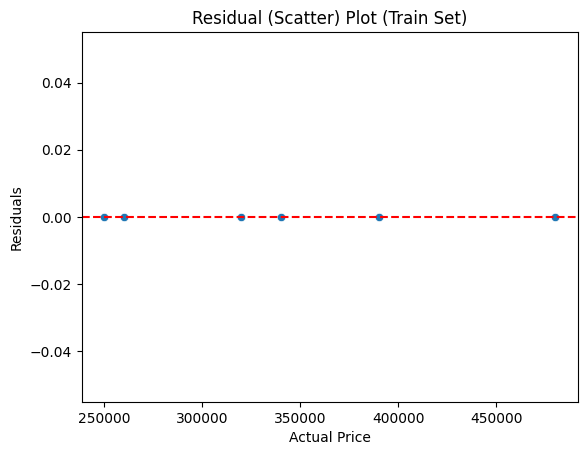

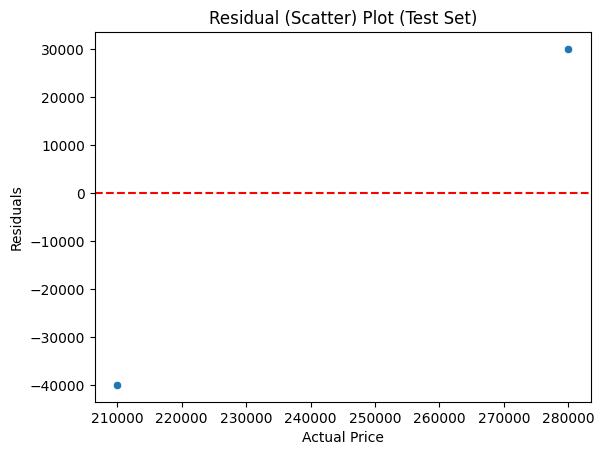

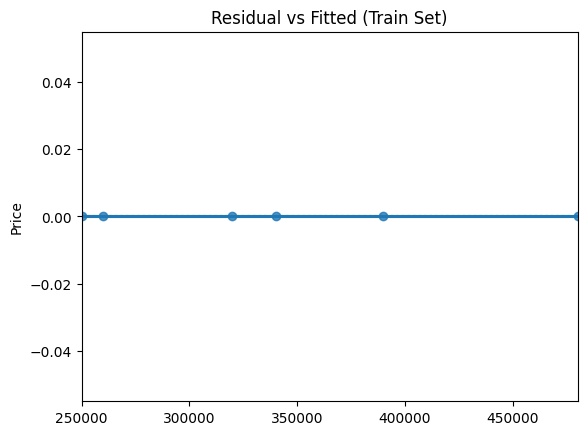

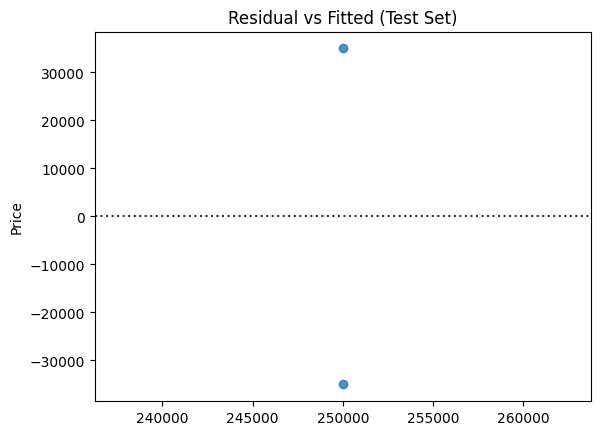

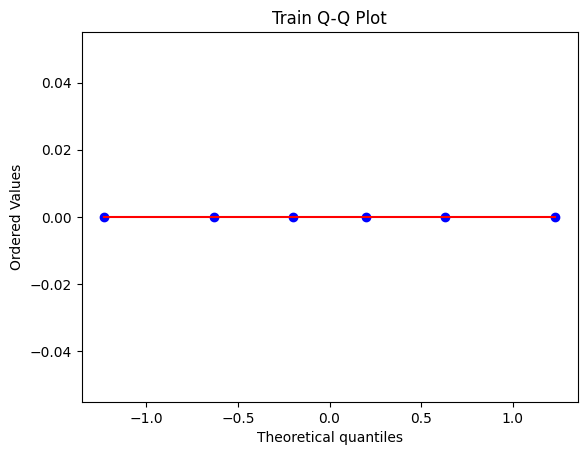

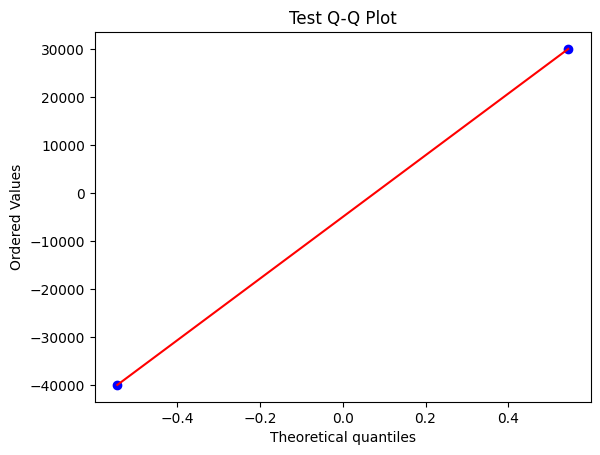

In [50]:
evaluate.evaluate_regression_model("Decision Tree", df_clean, decision_model, X_train, X_test, y_train, y_test, True)

evaluate.evaluate_regression_model("Decision Tree (With Scaled Data)", df_clean, decision_model, X_train_scaled, X_test_scaled, y_train, y_test, True)


---

### **Unsupervised Learning: KMeans Clustering**

Suppose we want to segment neighborhoods (unsupervised learning):

Length mismatch: clusters = 8 , df = 10


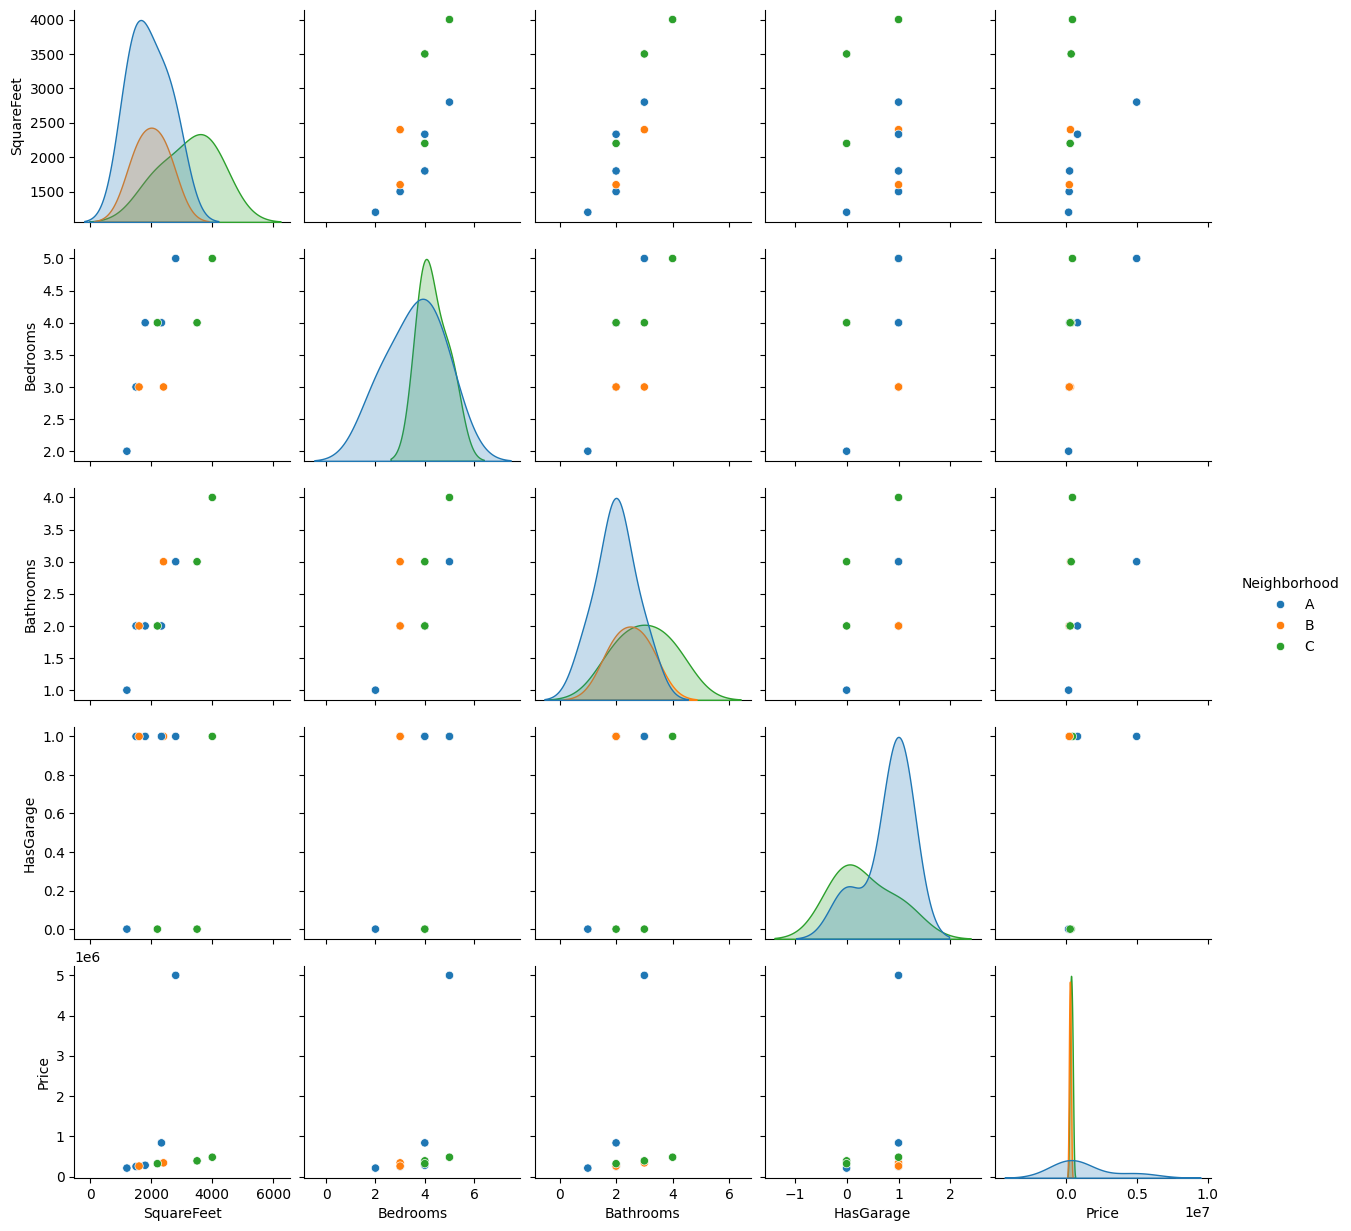

In [51]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X, y)

# Ensure both lengths match
if len(clusters) == len(df):
    df['Neighborhood'] = clusters
else:
    print("Length mismatch: clusters =", len(clusters), ", df =", len(df))
sns.pairplot(df, hue='Neighborhood')
plt.show()

* **MLE (Maximum Likelihood Estimation)** underpins logistic regression.
* Behind the scenes, **Gradient Descent** is optimizing the loss.

---

### **Final Model Evaluation (Ridge / Lasso )**

Use:

* **MAE**: `mean_absolute_error(y_test, y_pred)`
* **RMSE**: `np.sqrt(mean_squared_error(y_test, y_pred))`
* **R² Score**

In [52]:
evaluate.evaluate_regression_model("Ridge Regression", df_clean, ridge, X_train, X_test, y_train, y_test)




---Ridge Regression----


----Training Perfomance----
MAE: 11923.32
MSE (Empirical Risk): 212874702.55
RMSE:  14590.2263
R^2 Score: 0.9655


----Testing Perfomance----
MAE: 7730.58
MSE (Expected Risk): 115732833.10
RMSE:  10757.9196
R^2 Score: 0.9055


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [0.14595975        nan        nan        nan        nan]
Mean CV R^2: nan
CV RMSE Scores: [32345.0043102  29714.88855561 33585.90553469 54627.32467449
 22846.9343578 ]
Mean CV RMSE: 34624.01




## **Alternatively**
Binary Classification


For Classification (Logistic Regression on "Expensive" price):




----Logistic Regression ----
Classification Report (Train) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6




----Logistic Regression ----
Classification Report (Test) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



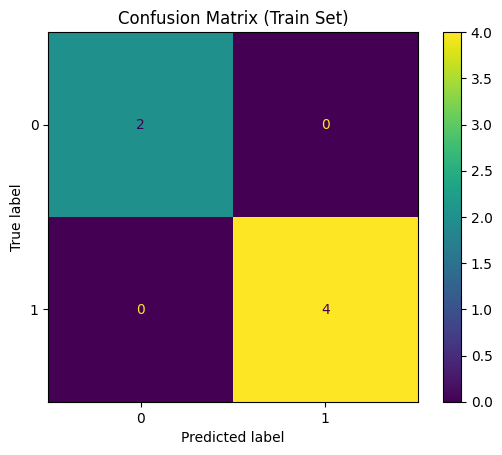

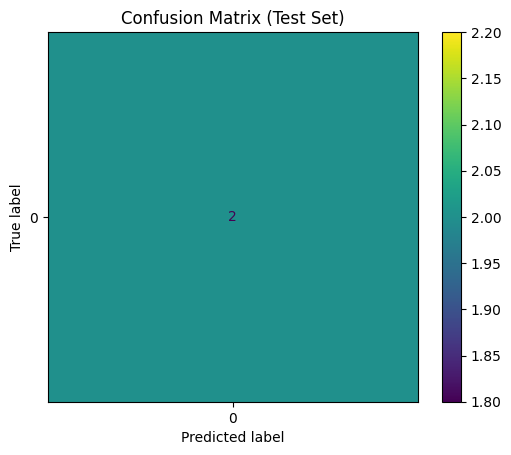

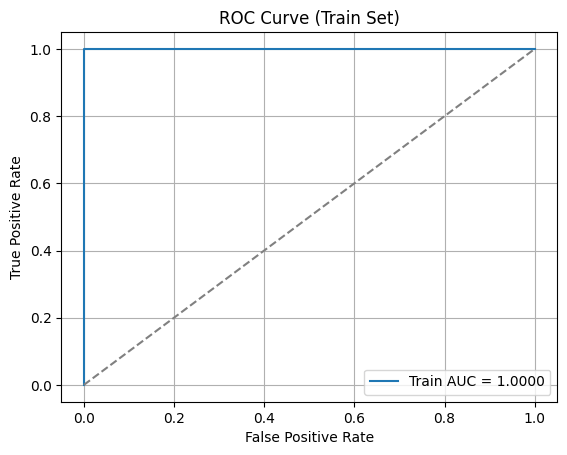

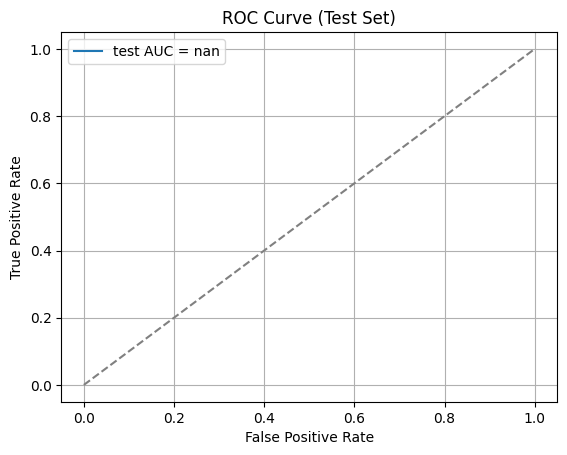

In [53]:
evaluate.evaluate_regression_model("Logistic Regression", df_clean, log_model, X_train, X_test, y_train, y_test, True, mtype="log", log_y_column="Expensive", log_x_columns=['SquareFeet', 'Bedrooms', 'Bathrooms', 'HasGarage', 'Neighborhood_B',
       'Neighborhood_C'])

---

## Summary: Tying It All Together

| Concept                      | Role                                             |
| ---------------------------- | ------------------------------------------------ |
| Linear/Polynomial Regression | Predict house prices                             |
| StatsModel                   | In-depth analysis, assumptions                   |
| Ridge/Lasso/CV               | Regularization, tuning                           |
| Logistic Regression          | Classification problems (e.g., expensive or not) |
| MLE, Gradient Descent        | Optimization under the hood                      |
| KMeans                       | Grouping/segmenting neighborhoods                |
| Bias-Variance Tradeoff       | Choose the right model complexity                |
| Cross-Validation             | Trustworthy model performance                    |
| Visualizations & Diagnostics | Validate assumptions                             |

---


## Pipelines & Ensemble

In [54]:
# Polynomial Regression Pipeline
poly_pipeline = Pipeline([
('scaler', StandardScaler()),
('poly', PolynomialFeatures(degree=2, include_bias=False)),
('linear', LinearRegression())
])

# LassoCV Pipeline
lasso_pipeline = Pipeline([
('scaler', StandardScaler()),
('lasso', LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000))
])

# RidgeCV Pipeline
ridge_pipeline = Pipeline([
('scaler', StandardScaler()),
('ridge', RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])

# Decision Tree (no scaling needed)
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)


### Create the Ensemble (Voting Regressor)


In [55]:
# Voting ensemble of all four models
ensemble_model = VotingRegressor([
('lasso', lasso_pipeline),
('poly', poly_pipeline),
('ridge', ridge_pipeline),
('tree', tree_model)
])


### Fit and Evaluate the Ensemble





---Ensemble----


----Training Perfomance----
MAE: 746.62
MSE (Empirical Risk): 730075.34
RMSE:  854.4445
R^2 Score: 0.9999


----Testing Perfomance----
MAE: 9219.26
MSE (Expected Risk): 117472720.32
RMSE:  10838.4833
R^2 Score: 0.9041


----Cross-Validation (on Training Data) ----
CV R^2 Scores: [nan nan nan nan nan]
Mean CV R^2: nan
CV RMSE Scores: [           nan 60441.80197718  1924.54943652 18046.64200011
 30509.01504763]
Mean CV RMSE: nan




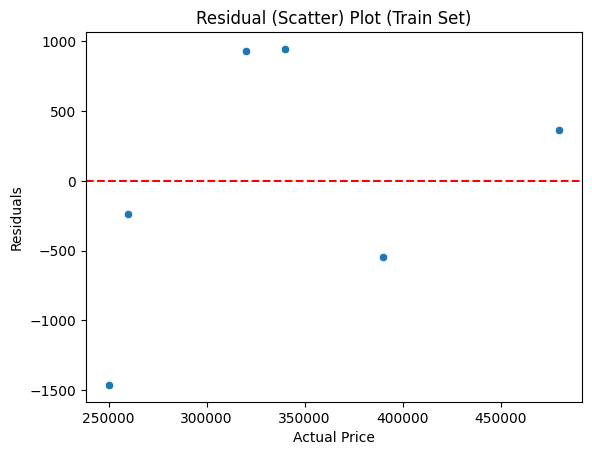

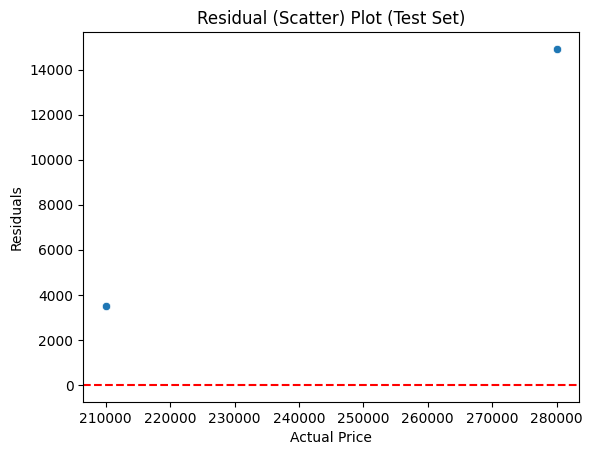

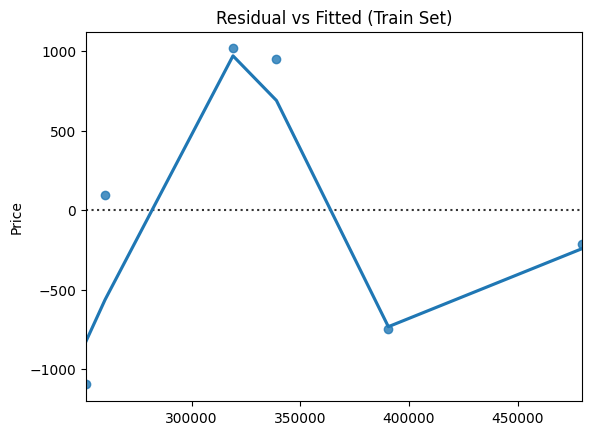

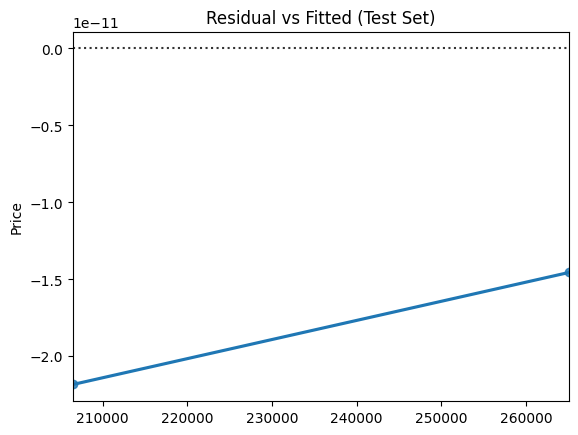

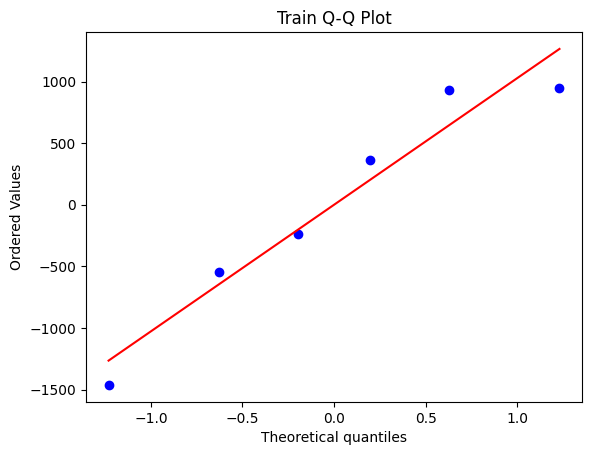

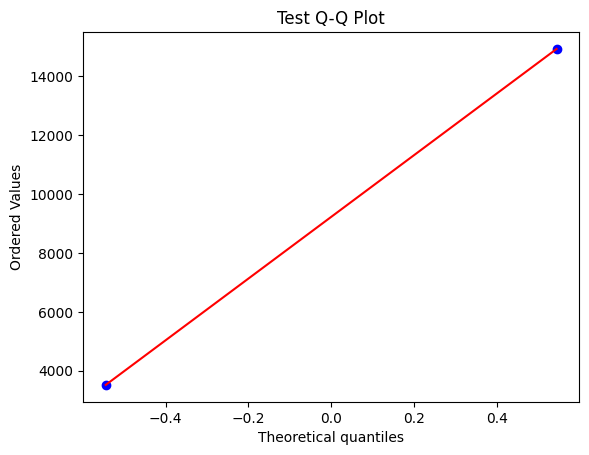

In [56]:
# Fit the ensemble
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

evaluate.evaluate_regression_model("Ensemble", df_clean, ensemble_model, X_train, X_test, y_train, y_test, True)